# Airbnb Verisini Haritalandırma

In [1]:
import numpy as np
import geopandas as gpd
import pandas as pd
import shapely.geometry as shp
import matplotlib.pyplot as plt

In [2]:
evler=pd.read_csv("./data/listings.csv")

In [3]:
type(evler)

pandas.core.frame.DataFrame

In [4]:
evler.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [5]:
evler.longitude

0        29.045730
1        28.987555
2        28.981530
3        28.986540
4        28.984020
           ...    
33254    29.069340
33255    29.057250
33256    29.117530
33257    28.963210
33258    29.055330
Name: longitude, Length: 33259, dtype: float64

In [6]:
evler.latitude

0        40.985690
1        41.034447
2        41.032540
3        41.034510
4        41.046720
           ...    
33254    40.883890
33255    41.090680
33256    40.928970
33257    41.021270
33258    41.164680
Name: latitude, Length: 33259, dtype: float64

In [7]:
evler["geometry"]=evler[["longitude","latitude"]].apply(shp.Point ,axis=1)

C:\Users\enes\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [8]:
evler["geometry"]

0          POINT (29.04573 40.98569)
1        POINT (28.987555 41.034447)
2          POINT (28.98153 41.03254)
3          POINT (28.98654 41.03451)
4          POINT (28.98402 41.04672)
                    ...             
33254      POINT (29.06934 40.88389)
33255      POINT (29.05725 41.09068)
33256      POINT (29.11753 40.92897)
33257      POINT (28.96321 41.02127)
33258      POINT (29.05533 41.16468)
Name: geometry, Length: 33259, dtype: object

In [9]:
evler.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,geometry
0,27266,Cozy flat on Anatolian side of İst1,90354,Lutfiye,NaN,Kadikoy,40.985690,29.045730,Entire home/apt,1318,1,0,NaN,NaN,1,90,0,NaN,POINT (29.04573 40.98569)
1,73477,Cozy Flat in center of Istanbul,383789,Berat,NaN,Beyoglu,41.034447,28.987555,Entire home/apt,1196,7,4,2022-08-27,0.54,1,299,4,NaN,POINT (28.987555 41.034447)
2,27271,Lovely apartment in perfect location,117026,Mutlu,NaN,Beyoglu,41.032540,28.981530,Entire home/apt,892,15,3,2022-01-09,0.03,1,188,1,NaN,POINT (28.98153 41.03254)
3,124137,Beautiful Artist's home staycation,594053,Devrim,NaN,Beyoglu,41.034510,28.986540,Entire home/apt,1695,1,82,2022-09-20,0.73,1,281,19,NaN,POINT (28.98654 41.03451)
4,28277,Duplex Apartment 11 with Terrace,121607,Alen Ziya,NaN,Sisli,41.046720,28.984020,Entire home/apt,1588,10,6,2022-07-27,0.36,19,338,5,NaN,POINT (28.98402 41.04672)


In [10]:
evler=gpd.GeoDataFrame(evler)

In [11]:
type(evler)

geopandas.geodataframe.GeoDataFrame

In [12]:
evler.crs ={"init":"epsg:4329"}

C:\Users\enes\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [13]:
evler.crs

<Geographic 2D CRS: +init=epsg:4329 +type=crs>
Name: WGS 84 (3D)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World: Afghanistan, Albania, Algeria, American Samoa, Andorra, Angola, Anguilla, Antarctica, Antigua and Barbuda, Argentina, Armenia, Aruba, Australia, Austria, Azerbaijan, Bahamas, Bahrain, Bangladesh, Barbados, Belgium, Belgium, Belize, Benin, Bermuda, Bhutan, Bolivia, Bonaire, Saint Eustasius and Saba, Bosnia and Herzegovina, Botswana, Bouvet Island, Brazil, British Indian Ocean Territory, British Virgin Islands, Brunei Darussalam, Bulgaria, Burkina Faso, Burundi, Cambodia, Cameroon, Canada, Cape Verde, Cayman Islands, Central African Republic, Chad, Chile, China, Christmas Island, Cocos (Keeling) Islands, Comoros, Congo, Cook Islands, Costa Rica, Côte d'Ivoire (Ivory Coast), Croatia, Cuba, Curacao, Cyprus, Czechia, Denmark, Djibouti, Dominica, Dominican Republic, East Timor, Ecuador, Egypt, El Salvador, Equato

In [14]:
evler.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,geometry
0,27266,Cozy flat on Anatolian side of İst1,90354,Lutfiye,NaN,Kadikoy,40.985690,29.045730,Entire home/apt,1318,1,0,NaN,NaN,1,90,0,NaN,POINT (29.04573 40.98569)
1,73477,Cozy Flat in center of Istanbul,383789,Berat,NaN,Beyoglu,41.034447,28.987555,Entire home/apt,1196,7,4,2022-08-27,0.54,1,299,4,NaN,POINT (28.98756 41.03445)
2,27271,Lovely apartment in perfect location,117026,Mutlu,NaN,Beyoglu,41.032540,28.981530,Entire home/apt,892,15,3,2022-01-09,0.03,1,188,1,NaN,POINT (28.98153 41.03254)
3,124137,Beautiful Artist's home staycation,594053,Devrim,NaN,Beyoglu,41.034510,28.986540,Entire home/apt,1695,1,82,2022-09-20,0.73,1,281,19,NaN,POINT (28.98654 41.03451)
4,28277,Duplex Apartment 11 with Terrace,121607,Alen Ziya,NaN,Sisli,41.046720,28.984020,Entire home/apt,1588,10,6,2022-07-27,0.36,19,338,5,NaN,POINT (28.98402 41.04672)


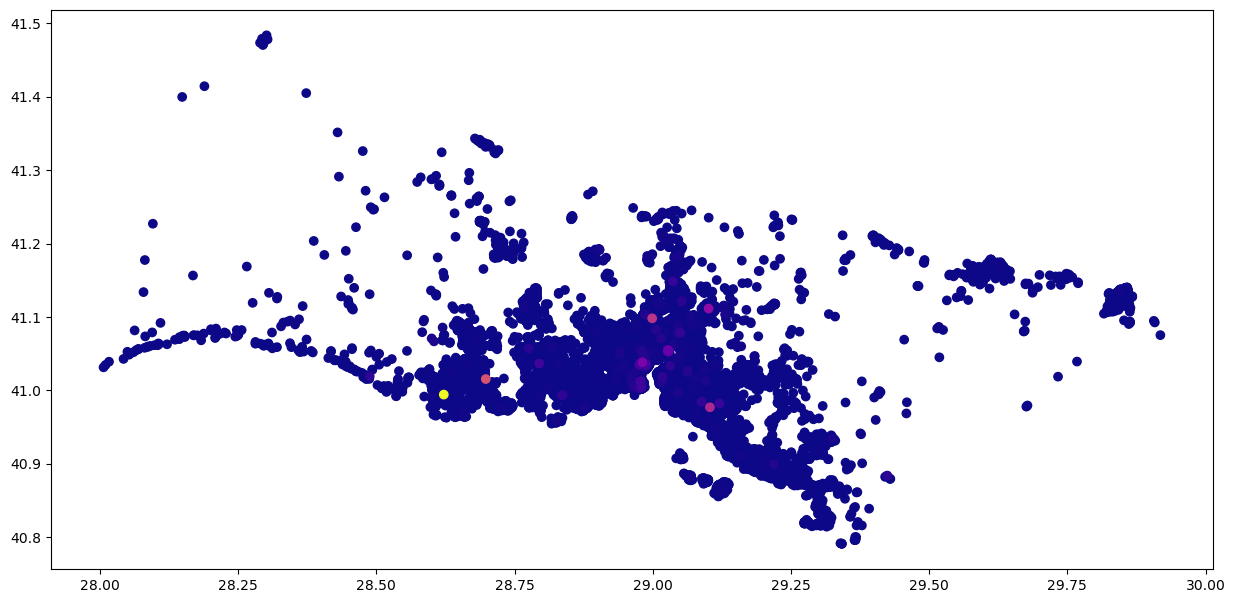

In [15]:
evler.sort_values("price").plot("price",cmap="plasma",figsize=(15,15));

In [16]:
ist_ilce=gpd.read_file("./data/neighbourhoods.geojson")

In [17]:
ist_ilce.head()

,neighbourhood,neighbourhood_group,geometry
0,Sile,None,"MULTIPOLYGON (((29.40004 41.08274, 29.40101 41..."
1,Catalca,None,"MULTIPOLYGON (((28.53614 41.10624, 28.53185 41..."
2,Eyup,None,"MULTIPOLYGON (((28.94881 41.26322, 28.94760 41..."
3,Sariyer,None,"MULTIPOLYGON (((29.05429 41.08144, 29.05436 41..."
4,Arnavutkoy,None,"MULTIPOLYGON (((28.81849 41.13628, 28.80986 41..."


In [18]:
evler2=evler.dropna(subset=["name"])

In [19]:
evler2.loc[evler2["name"].str.contains("metrobüs")]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,geometry
674,2370174,"house close to metro, metrobüs,public transpor...",12105757,Mevsim,NaN,Kucukcekmece,41.036320,28.762880,Private room,428,2,0,NaN,NaN,1,0,0,NaN,POINT (28.76288 41.03632)
1963,10932179,Cozy home with balcony close to metrobüs and m...,56677778,Denizhan,NaN,Uskudar,41.005740,29.054360,Private room,830,1,2,2021-10-01,0.12,1,365,1,NaN,POINT (29.05436 41.00574)
2601,15352408,Ferah aydınlık he huzurlu metro ve metrobüse 5...,72694624,Ramazan,NaN,Bahcelievler,40.992550,28.846680,Private room,367,3,10,2022-07-30,0.21,1,335,5,NaN,POINT (28.84668 40.99255)
3045,20784335,haramidere metrobüs /opposite haramidere metrobus,84972136,Bahadir,NaN,Beylikduzu,41.003130,28.671190,Private room,300,1,2,2018-09-23,0.03,1,365,0,NaN,POINT (28.67119 41.00313)
3398,23605973,Deniz manzaralı metrobüse yürüme mesafesinde,176551435,Selma,NaN,Avcilar,40.973390,28.739710,Entire home/apt,950,30,17,2022-04-17,0.31,5,169,2,NaN,POINT (28.73971 40.97339)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31737,714215889623489420,Güzelyurt havuzlu metrobüse yakın konut,366084709,Ahmet,NaN,Esenyurt,41.012000,28.672460,Entire home/apt,499,1,0,NaN,NaN,2,281,0,NaN,POINT (28.67246 41.01200)
31834,713565440076015323,"merkezi, metroya 10 dk, metrobüse 15 dk mesafede",478216612,Setenay,NaN,Besiktas,41.065130,29.003170,Private room,240,1,0,NaN,NaN,1,349,0,NaN,POINT (29.00317 41.06513)
32391,717391453640210154,Metro metrobüse çok yakın Çağlayan,168563274,Serhat,NaN,Kagithane,41.073634,28.983493,Private room,350,1,0,NaN,NaN,1,365,0,NaN,POINT (28.98349 41.07363)
32501,718913304124031958,"Emaar Avm, metrobüs,metroya yürüme mesafesinde",480064536,Zahide Nur,NaN,Uskudar,41.004138,29.067283,Shared room,371,1,0,NaN,NaN,1,152,0,NaN,POINT (29.06728 41.00414)


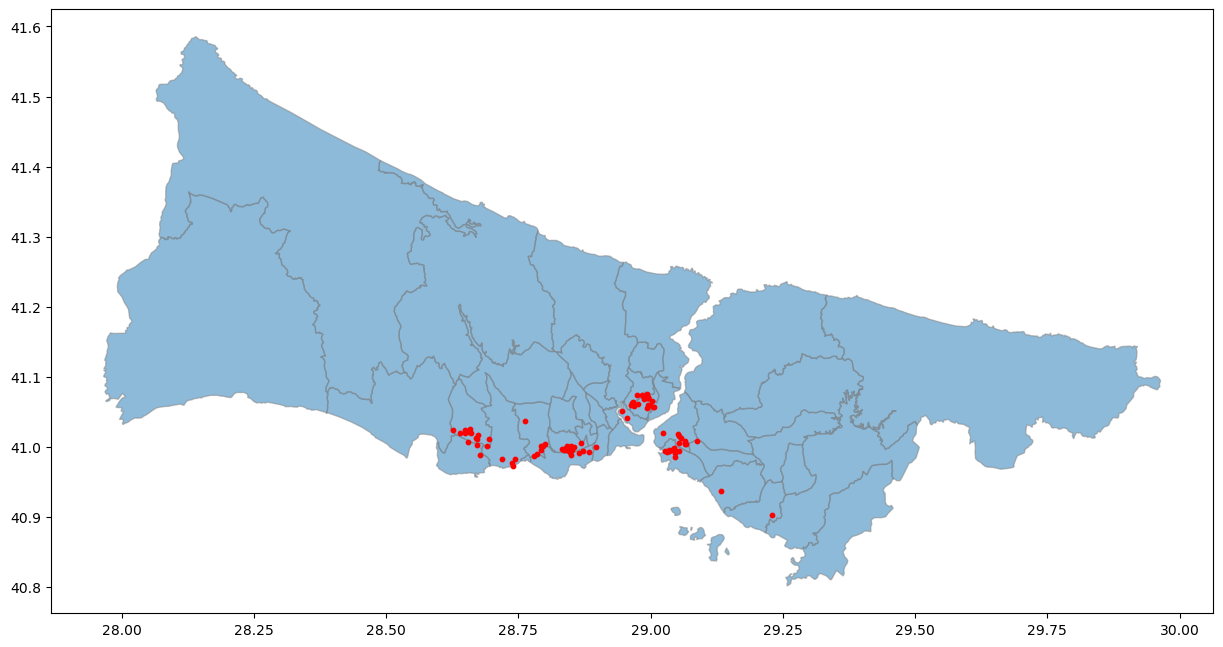

In [20]:
ax=ist_ilce.plot(figsize=(15,15),alpha=0.5,edgecolor="gray")
evler2.loc[evler2["name"].str.contains("metrobüs")].plot(ax=ax,color="red",marker="o",markersize=10);

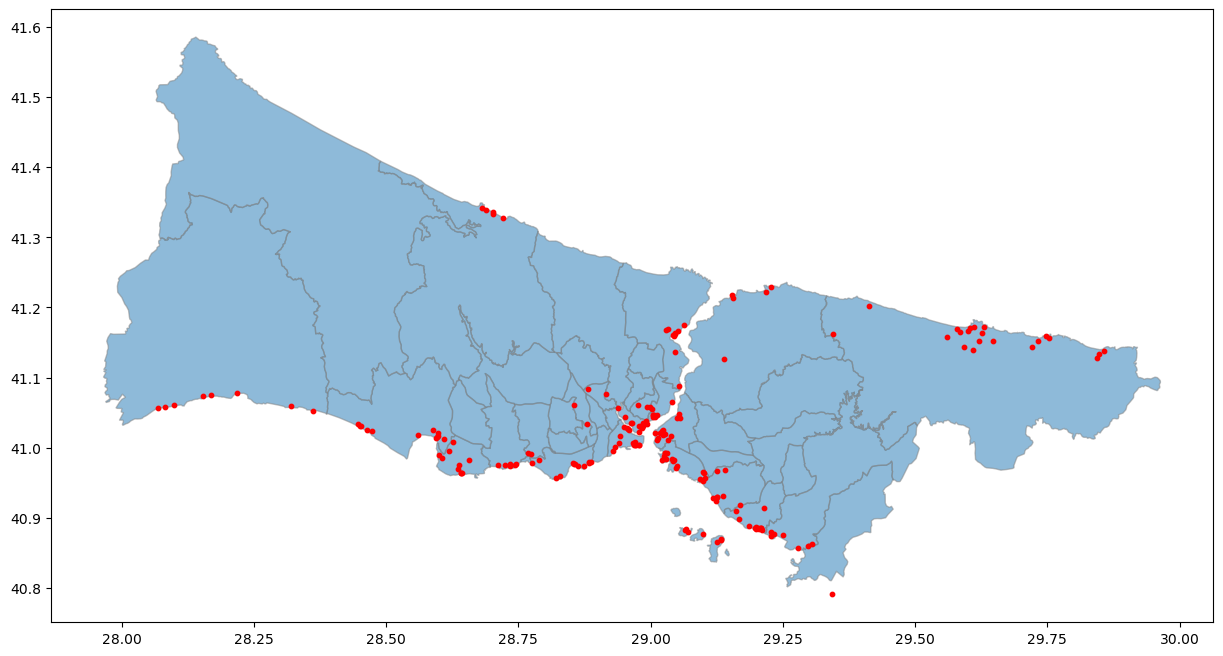

In [21]:
ax=ist_ilce.plot(figsize=(15,15),alpha=0.5,edgecolor="gray")
evler2.loc[evler2["name"].str.contains("deniz")].plot(ax=ax,color="red",marker="o",markersize=10);

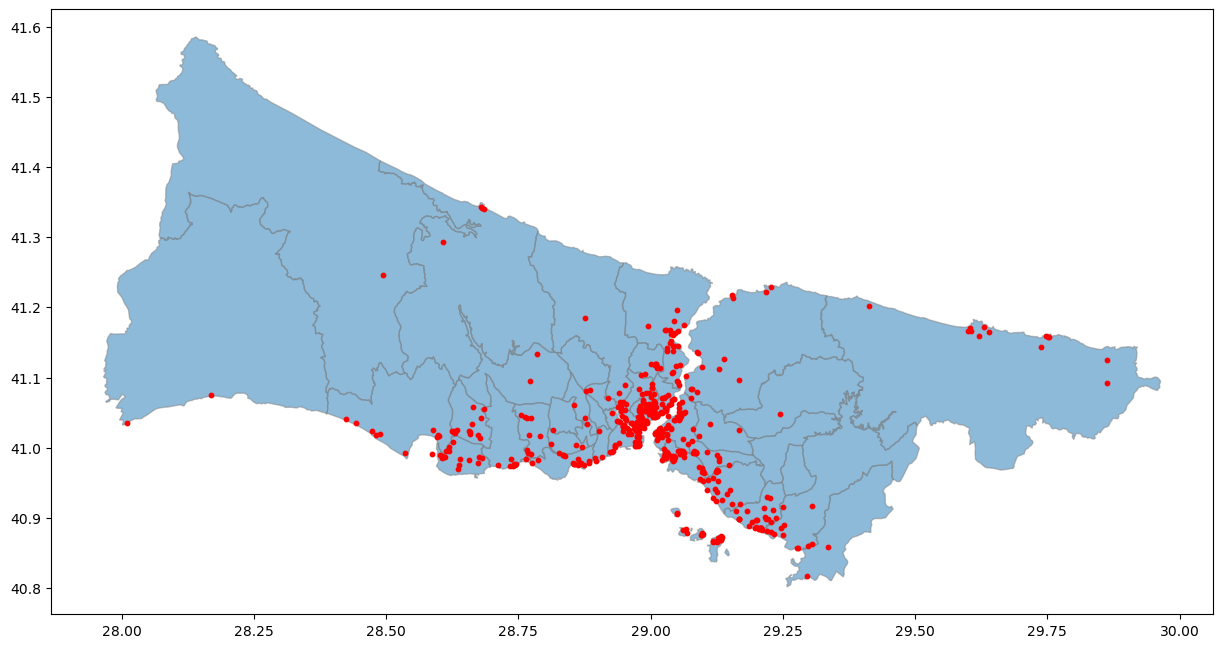

In [22]:
ax=ist_ilce.plot(figsize=(15,15),alpha=0.5,edgecolor="gray")
evler2.loc[evler2["name"].str.contains("manzara")].plot(ax=ax,color="red",marker="o",markersize=10);

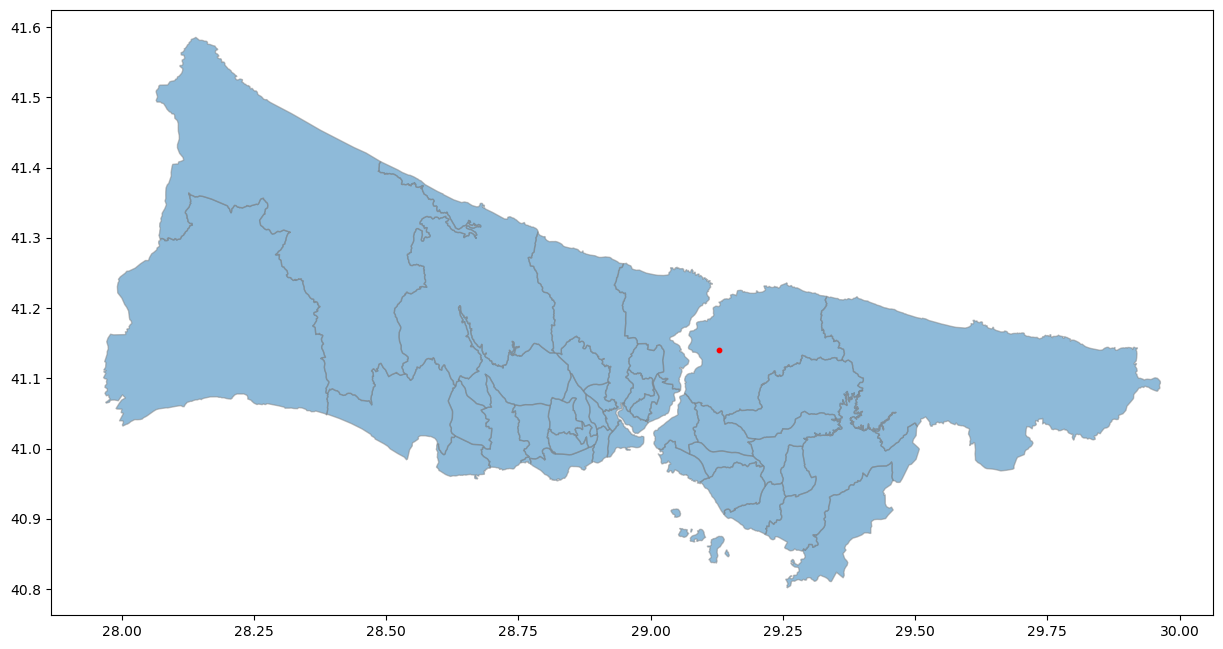

In [23]:
ax=ist_ilce.plot(figsize=(15,15),alpha=0.5,edgecolor="gray")
evler2.loc[evler2["name"].str.contains("beykoz")].plot(ax=ax,color="red",marker="o",markersize=10);

In [24]:
birlestirilmis=gpd.sjoin(evler2,ist_ilce,op="within",how="left")

C:\Users\enes\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\enes\AppData\Local\Temp\ipykernel_9192\3014130259.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4329 +type=crs
Right CRS: EPSG:4326

  birlestirilmis=gpd.sjoin(evler2,ist_ilce,op="within",how="left")


In [25]:
birlestirilmis.head()

,id,name,host_id,host_name,neighbourhood_group_left,neighbourhood_left,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,geometry,index_right,neighbourhood_right,neighbourhood_group_right
0,27266,Cozy flat on Anatolian side of İst1,90354,Lutfiye,NaN,Kadikoy,40.985690,29.045730,Entire home/apt,1318,...,NaN,NaN,1,90,0,NaN,POINT (29.04573 40.98569),29.0,Kadikoy,None
1,73477,Cozy Flat in center of Istanbul,383789,Berat,NaN,Beyoglu,41.034447,28.987555,Entire home/apt,1196,...,2022-08-27,0.54,1,299,4,NaN,POINT (28.98756 41.03445),22.0,Beyoglu,None
2,27271,Lovely apartment in perfect location,117026,Mutlu,NaN,Beyoglu,41.032540,28.981530,Entire home/apt,892,...,2022-01-09,0.03,1,188,1,NaN,POINT (28.98153 41.03254),22.0,Beyoglu,None
3,124137,Beautiful Artist's home staycation,594053,Devrim,NaN,Beyoglu,41.034510,28.986540,Entire home/apt,1695,...,2022-09-20,0.73,1,281,19,NaN,POINT (28.98654 41.03451),22.0,Beyoglu,None
4,28277,Duplex Apartment 11 with Terrace,121607,Alen Ziya,NaN,Sisli,41.046720,28.984020,Entire home/apt,1588,...,2022-07-27,0.36,19,338,5,NaN,POINT (28.98402 41.04672),25.0,Sisli,None


In [26]:
ort_hesap=birlestirilmis.groupby(["neighbourhood_right"]).mean()

In [27]:
ort_hesap

,id,host_id,neighbourhood_group_left,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,index_right
neighbourhood_right,,,,,,,,,,,,,,
Adalar,2.482040e+17,2.244820e+08,NaN,40.874904,29.110367,1602.190332,21.673716,13.667674,1.395909,4.634441,246.163142,6.734139,NaN,37.0
Arnavutkoy,3.623679e+17,3.266822e+08,NaN,41.229591,28.697604,1560.401198,31.628743,7.209581,1.881648,15.910180,295.131737,5.299401,NaN,4.0
Atasehir,3.401351e+17,2.999869e+08,NaN,40.988591,29.110292,2364.425234,12.943925,4.510903,0.984358,6.051402,303.202492,2.820872,NaN,30.0
Avcilar,3.531846e+17,3.132519e+08,NaN,40.996889,28.717350,3985.304734,15.911243,2.139053,0.708714,14.822485,281.319527,1.278107,NaN,10.0
Bagcilar,3.631517e+17,3.307493e+08,NaN,41.048442,28.818452,1361.699659,5.298635,4.470990,0.933706,15.223549,303.670648,3.276451,NaN,15.0
Bahcelievler,3.560417e+17,3.164568e+08,NaN,41.000444,28.839067,1409.306220,13.435407,2.863636,0.919362,4.674641,302.110048,2.052632,NaN,11.0
Bakirkoy,3.556176e+17,2.670761e+08,NaN,40.981403,28.858635,1604.851765,48.781176,3.567059,1.002256,7.560000,276.576471,1.905882,NaN,12.0
Basaksehir,3.500901e+17,3.057605e+08,NaN,41.093238,28.763680,1860.241379,9.281167,1.779841,0.592733,7.246684,292.485411,1.098143,NaN,14.0
Bayrampasa,4.194297e+17,3.470871e+08,NaN,41.047090,28.900212,1221.064516,3.854839,1.822581,1.358333,5.048387,310.112903,1.403226,NaN,19.0


In [28]:
birles_hesap=birlestirilmis.groupby(["neighbourhood_right"]).mean().sort_values("price",ascending=False)

In [29]:
birles_hesap

,id,host_id,neighbourhood_group_left,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,index_right
neighbourhood_right,,,,,,,,,,,,,,
Beylikduzu,4.364880e+17,3.419830e+08,NaN,40.991679,28.643554,7885.795053,9.897527,1.597173,0.946810,2.770318,301.289753,1.388693,NaN,9.0
Beykoz,2.756654e+17,2.439184e+08,NaN,41.115409,29.134375,6434.820106,48.417989,4.100529,0.916588,6.582011,295.216931,2.698413,NaN,27.0
Avcilar,3.531846e+17,3.132519e+08,NaN,40.996889,28.717350,3985.304734,15.911243,2.139053,0.708714,14.822485,281.319527,1.278107,NaN,10.0
Sariyer,3.255836e+17,2.505266e+08,NaN,41.143173,29.042403,2787.039900,7.501247,4.775561,0.991469,7.289277,280.695761,2.910224,NaN,3.0
Silivri,4.341038e+17,3.071932e+08,NaN,41.080300,28.219133,2689.217949,4.602564,2.025641,0.904286,1.551282,284.461538,0.948718,NaN,5.0
Buyukcekmece,3.780187e+17,3.127044e+08,NaN,41.022874,28.548839,2629.427027,40.232432,1.394595,0.766486,2.556757,317.972973,0.962162,NaN,7.0
Besiktas,2.900073e+17,2.281568e+08,NaN,41.054897,29.013546,2599.425856,12.800856,7.066065,1.094668,8.884981,271.230513,3.890684,NaN,23.0
Atasehir,3.401351e+17,2.999869e+08,NaN,40.988591,29.110292,2364.425234,12.943925,4.510903,0.984358,6.051402,303.202492,2.820872,NaN,30.0
Fatih,1.961374e+17,2.240437e+08,NaN,41.009890,28.963158,2069.116071,24.555804,17.428013,1.205495,15.461775,296.805525,6.173828,NaN,21.0


In [30]:
birlestirilmis["toplam"]=1

In [31]:
birlestirilmis

,id,name,host_id,host_name,neighbourhood_group_left,neighbourhood_left,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,geometry,index_right,neighbourhood_right,neighbourhood_group_right,toplam
0,27266,Cozy flat on Anatolian side of İst1,90354,Lutfiye,NaN,Kadikoy,40.985690,29.045730,Entire home/apt,1318,...,NaN,1,90,0,NaN,POINT (29.04573 40.98569),29.0,Kadikoy,None,1
1,73477,Cozy Flat in center of Istanbul,383789,Berat,NaN,Beyoglu,41.034447,28.987555,Entire home/apt,1196,...,0.54,1,299,4,NaN,POINT (28.98756 41.03445),22.0,Beyoglu,None,1
2,27271,Lovely apartment in perfect location,117026,Mutlu,NaN,Beyoglu,41.032540,28.981530,Entire home/apt,892,...,0.03,1,188,1,NaN,POINT (28.98153 41.03254),22.0,Beyoglu,None,1
3,124137,Beautiful Artist's home staycation,594053,Devrim,NaN,Beyoglu,41.034510,28.986540,Entire home/apt,1695,...,0.73,1,281,19,NaN,POINT (28.98654 41.03451),22.0,Beyoglu,None,1
4,28277,Duplex Apartment 11 with Terrace,121607,Alen Ziya,NaN,Sisli,41.046720,28.984020,Entire home/apt,1588,...,0.36,19,338,5,NaN,POINT (28.98402 41.04672),25.0,Sisli,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33254,35073875,Cute Concept House of Burgaz,56580878,Reyhan,NaN,Adalar,40.883890,29.069340,Entire home/apt,2210,...,0.25,2,364,0,NaN,POINT (29.06934 40.88389),NaN,NaN,NaN,1
33255,544189343876574441,Breathtaking Bosphorus View With Large Terrace,164058076,Ali,NaN,Sariyer,41.090680,29.057250,Entire home/apt,2600,...,3.46,6,211,27,NaN,POINT (29.05725 41.09068),NaN,NaN,NaN,1
33256,677588431709009582,Maltepe sahilde deniz manzaralı karavan keyfi,164487971,İlhan,NaN,Maltepe,40.928970,29.117530,Entire home/apt,500,...,NaN,1,365,0,NaN,POINT (29.11753 40.92897),NaN,NaN,NaN,1
33257,3885996,Apart Room * 1 minute walk to metro & ferry stop,20099004,Duran,NaN,Fatih,41.021270,28.963210,Entire home/apt,1160,...,0.62,6,350,2,NaN,POINT (28.96321 41.02127),NaN,NaN,NaN,1


In [32]:
toplamlar=birlestirilmis.groupby(["neighbourhood_right"]).count()["toplam"]

In [33]:
toplamlar

neighbourhood_right
Adalar            331
Arnavutkoy        167
Atasehir          642
Avcilar           338
Bagcilar          586
Bahcelievler      418
Bakirkoy          425
Basaksehir        377
Bayrampasa         62
Besiktas         2104
Beykoz            189
Beylikduzu        283
Beyoglu          7732
Buyukcekmece      185
Catalca            34
Cekmekoy           95
Esenler            55
Esenyurt         1195
Eyup              333
Fatih            3584
Gaziosmanpasa     114
Gungoren           85
Kadikoy          3601
Kagithane         849
Kartal            342
Kucukcekmece      327
Maltepe           615
Pendik            348
Sancaktepe         77
Sariyer           401
Sile              404
Silivri            78
Sisli            4756
Sultanbeyli        26
Sultangazi         45
Tuzla             140
Umraniye          445
Uskudar          1077
Zeytinburnu       184
Name: toplam, dtype: int64

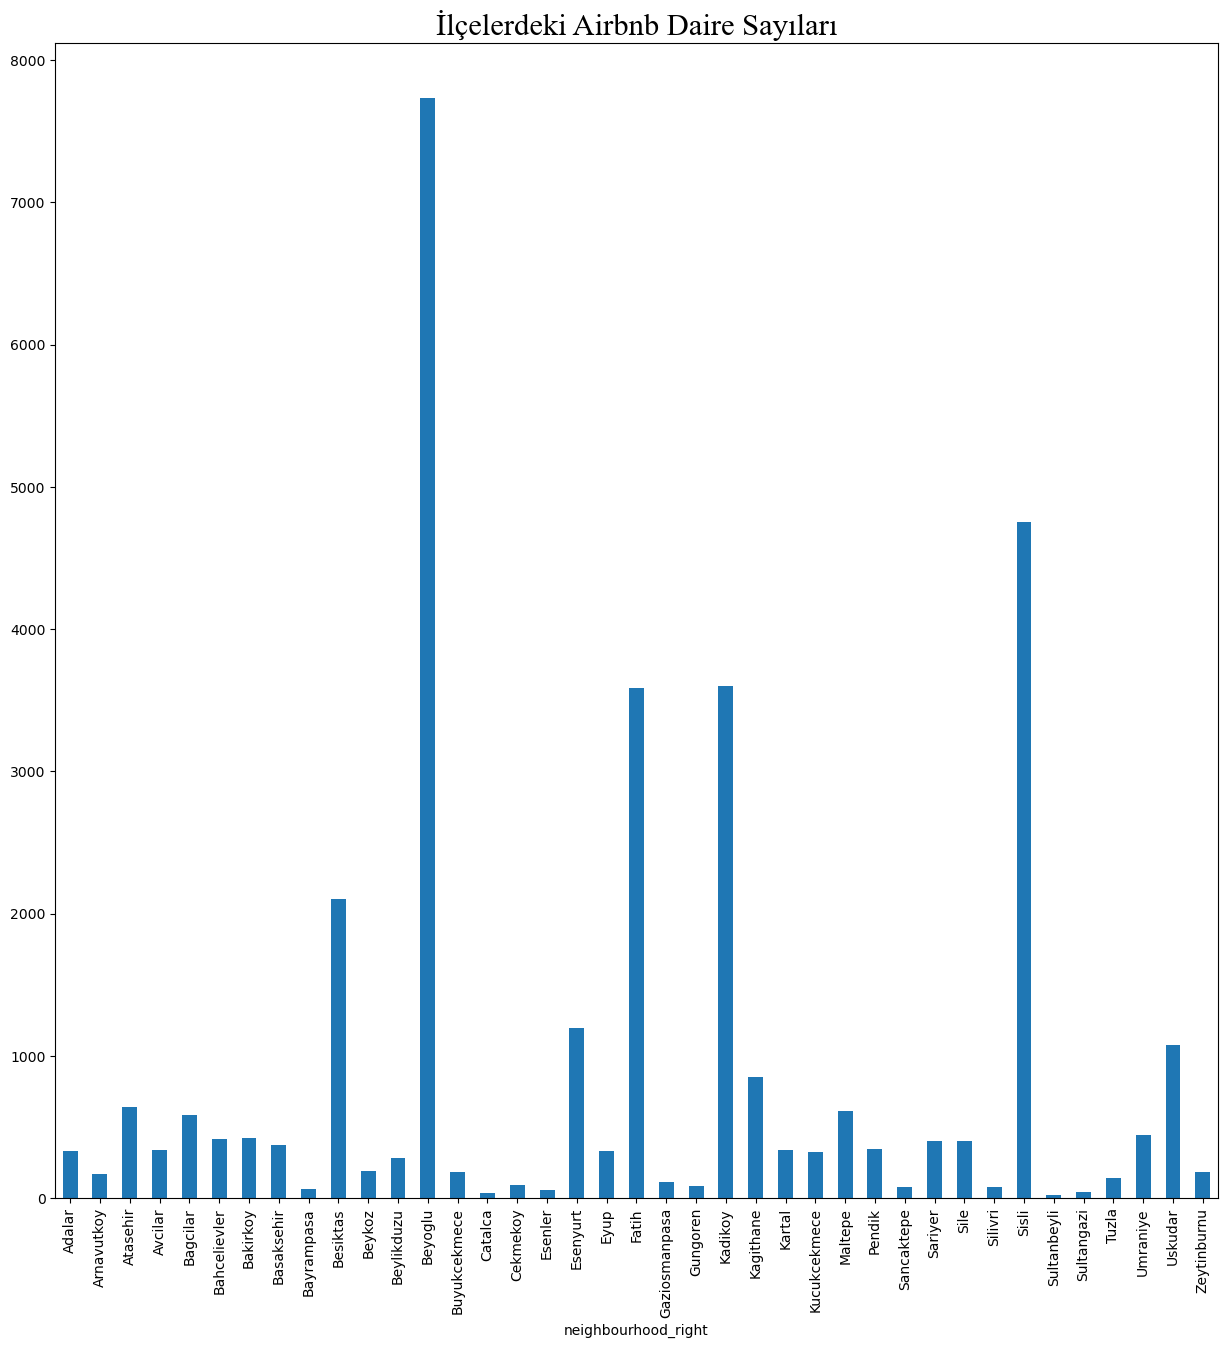

In [34]:
toplamlar.plot(kind="bar",figsize=(15,15))
plt.title("İlçelerdeki Airbnb Daire Sayıları",fontdict={"fontname":"Times New Roman","fontsize":22});

In [35]:
type(toplamlar)

pandas.core.series.Series

In [36]:
toplamlar2=toplamlar.to_frame()

In [37]:
toplamlar2

,toplam
neighbourhood_right,
Adalar,331
Arnavutkoy,167
Atasehir,642
Avcilar,338
Bagcilar,586
Bahcelievler,418
Bakirkoy,425
Basaksehir,377
Bayrampasa,62


In [38]:
ist_ilce_birlestirilmis=ist_ilce.merge(birles_hesap,
                                       left_on="neighbourhood",
                                       right_on="neighbourhood_right"                                      
                                      )

In [39]:
ist_ilce_birlestirilmis.head()

,neighbourhood,neighbourhood_group,geometry,id,host_id,neighbourhood_group_left,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,index_right
0,Sile,None,"MULTIPOLYGON (((29.40004 41.08274, 29.40101 41...",3.537903e+17,3.039717e+08,NaN,41.144825,29.711484,1717.153465,85.074257,4.811881,1.055600,5.700495,288.183168,2.633663,NaN,0.0
1,Catalca,None,"MULTIPOLYGON (((28.53614 41.10624, 28.53185 41...",3.070648e+17,2.763545e+08,NaN,41.283934,28.405173,2049.529412,3.058824,6.352941,1.614737,6.147059,332.529412,4.647059,NaN,1.0
2,Eyup,None,"MULTIPOLYGON (((28.94881 41.26322, 28.94760 41...",3.385689e+17,2.834385e+08,NaN,41.096012,28.927136,1182.636637,35.192192,3.849850,0.973732,3.867868,288.042042,1.729730,NaN,2.0
3,Sariyer,None,"MULTIPOLYGON (((29.05429 41.08144, 29.05436 41...",3.255836e+17,2.505266e+08,NaN,41.143173,29.042403,2787.039900,7.501247,4.775561,0.991469,7.289277,280.695761,2.910224,NaN,3.0
4,Arnavutkoy,None,"MULTIPOLYGON (((28.81849 41.13628, 28.80986 41...",3.623679e+17,3.266822e+08,NaN,41.229591,28.697604,1560.401198,31.628743,7.209581,1.881648,15.910180,295.131737,5.299401,NaN,4.0


In [40]:
ist_ilce_birlestirilmis.to_file("outputs/ist_ilce_birlestirilmis.geojson",driver="GeoJSON")

## Gorsellestirme

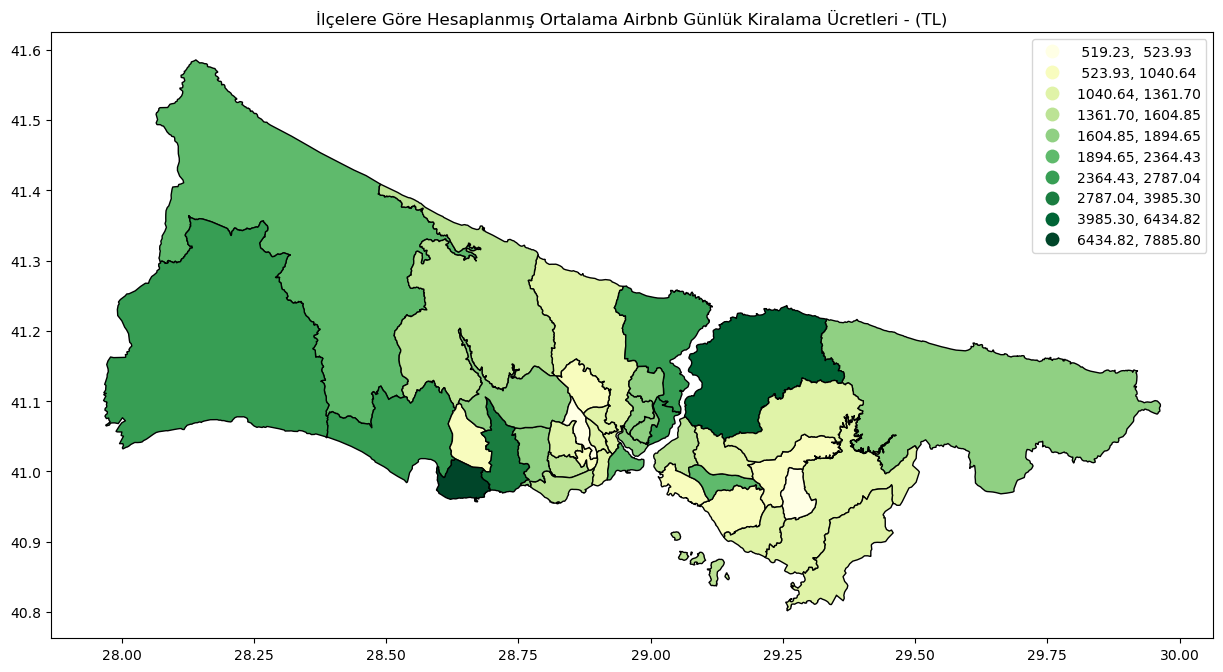

In [41]:

ax = ist_ilce_birlestirilmis.plot(figsize=(15,15), column='price', scheme='fisher_jenks', k=10, legend=True, cmap='YlGn', edgecolor='black')
ax.set_title("İlçelere Göre Hesaplanmış Ortalama Airbnb Günlük Kiralama Ücretleri - (TL)")
plt.savefig('outputs/istanbul-airbnb-listelenmis-ilce-bazli-map.png', dpi=300)

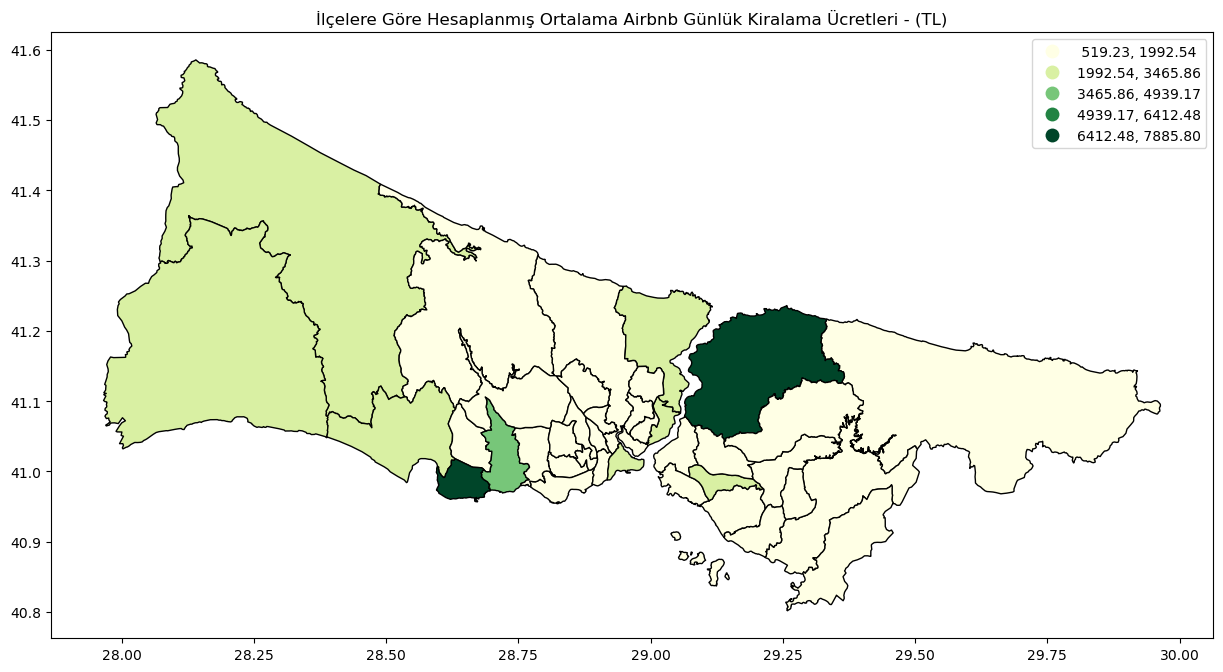

In [42]:
ax = ist_ilce_birlestirilmis.plot(figsize=(15,15), column='price', scheme='equal_interval', k=5, legend=True, cmap='YlGn', edgecolor='black')
ax.set_title("İlçelere Göre Hesaplanmış Ortalama Airbnb Günlük Kiralama Ücretleri - (TL)")
plt.savefig('outputs/istanbul-airbnb-listelenmis-ilce-bazli-map.png', dpi=300)

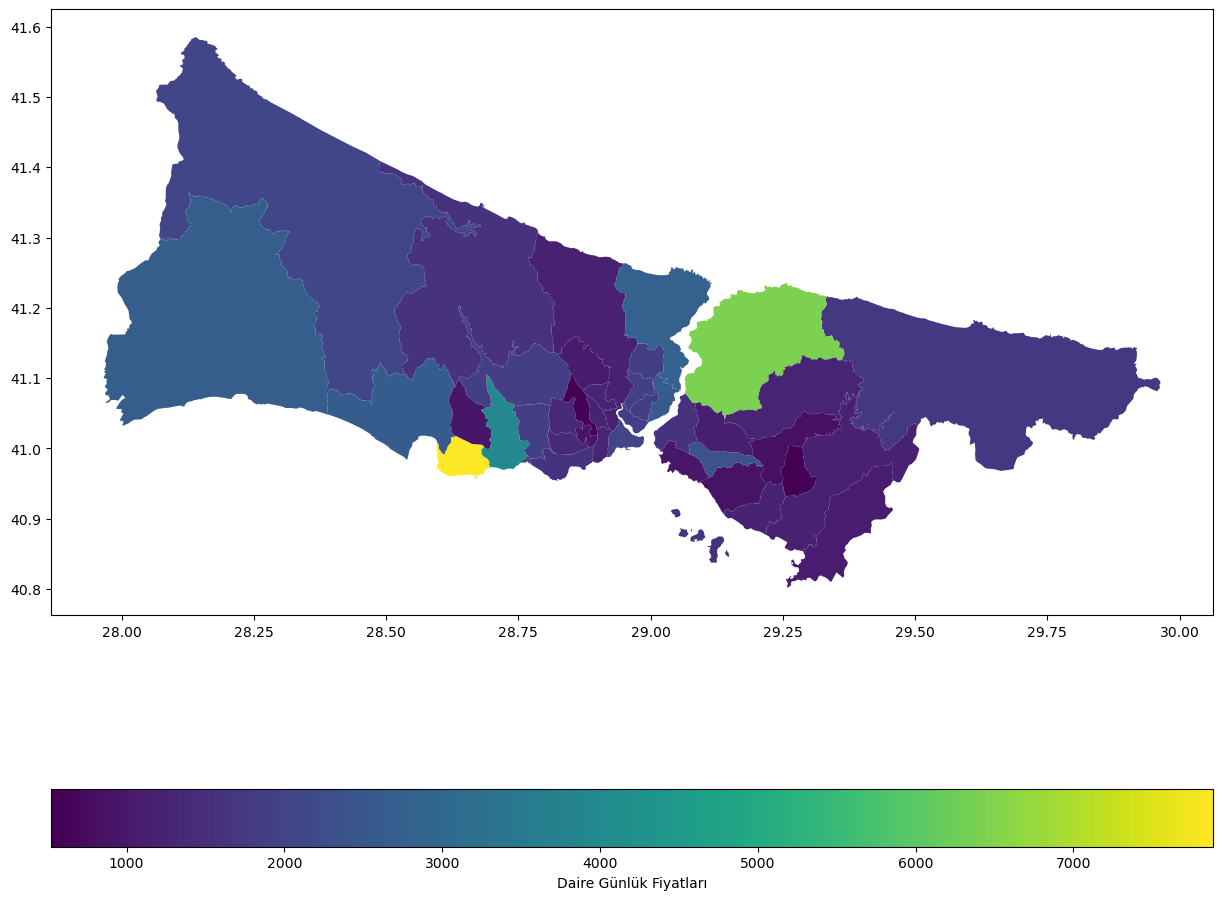

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
ist_ilce_birlestirilmis.plot(column='price', ax=ax, legend=True, legend_kwds={'label': "Daire Günlük Fiyatları",'orientation': "horizontal"});

In [44]:
ist_secilmis = ist_ilce_birlestirilmis[(ist_ilce_birlestirilmis['price']< 600)]

In [45]:
ist_secilmis.head()

,neighbourhood,neighbourhood_group,geometry,id,host_id,neighbourhood_group_left,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,index_right
18,Esenler,None,"MULTIPOLYGON (((28.89912 41.02157, 28.89775 41...",1.829128e+17,2.076727e+08,NaN,41.037793,28.881999,523.927273,8.563636,1.200000,0.728421,18.727273,157.163636,0.727273,NaN,18.0
33,Sultanbeyli,None,"MULTIPOLYGON (((29.28755 41.00274, 29.28668 40...",3.589748e+17,2.802174e+08,NaN,40.958085,29.276508,519.230769,1.615385,0.615385,0.564286,1.461538,278.269231,0.500000,NaN,33.0


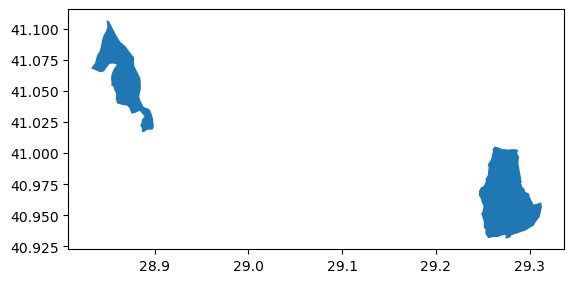

In [46]:
ist_secilmis.plot();